## Install package

In [18]:
pip uninstall shapely

Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install -c conda-forge cartopy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/software/anaconda3/2022.10

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.21.1             |   py39h1176785_0         1.6 MB
    geos-3.8.0                 |       he6710b0_0         961 KB
    proj-9.0.0                 |       h93bde94_1         3.0 MB  conda-forge
    pyproj-3.3.1               |   py39hcadae2f_0         467 KB  conda-forge
    pyshp-2.3.1                |     pyhd8ed1ab_0         941 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    shapely-2.0.1              |   py39h0fbb895_0         433 KB
    ----------------

In [15]:
pip install Cartopy

Defaulting to user installation because normal site-packages is not writeable
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached shapely-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Using cached pyproj-3.5.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for Cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [287 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-39
      creating build/lib.linux-x86_64-cpython-39/cartopy
     

In [3]:
pip install xarray

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cmocean

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Import package

In [1]:
import cartopy

In [2]:
import cartopy.crs as ccrs

In [3]:
import matplotlib.pyplot as plt

In [4]:
import xarray as xr

In [5]:
import numpy as np

In [6]:
import cmocean as com

In [7]:
import cartopy.feature as cfeature

In [30]:
from matplotlib import colorbar, colors
from matplotlib.colors import LinearSegmentedColormap,TwoSlopeNorm

In [9]:
import scipy.interpolate
from scipy.interpolate import interp2d

## Data of Biomass of coccolithophores

### For all the coccolithophores

In [10]:
ds=xr.open_dataset("../biomass.nc")
bio=np.random.rand(160,360)
j=0.0
for i in range(50):
    j=41+i
    bio=bio+ds.CarbonBiomass.sel(PhyNum=str(j))

In [11]:
bio_array=bio.to_numpy()

In [12]:
bio_array

array([[0.25157343, 0.24997523, 0.63858606, ..., 0.27097685, 0.73169305,
        0.65435355],
       [0.44626982, 0.14143674, 0.89772557, ..., 0.72468767, 0.14500144,
        0.08579982],
       [0.69389424, 0.24683101, 0.34658042, ..., 0.54634752, 0.78211644,
        0.46126656],
       ...,
       [0.87466781, 0.77991033, 0.31343502, ..., 0.58305914, 0.26873722,
        0.94918717],
       [0.87511007, 0.31848533, 0.13187559, ..., 0.42684433, 0.07755366,
        0.61511313],
       [0.26645567, 0.18017998, 0.99307987, ..., 0.66598315, 0.80971683,
        0.27093974]])

### For different thermal types

In [42]:
ds=xr.open_dataset("../biomass.nc")
bio=np.random.rand(10,5,160,360)
k=0.0
for i in (n+1 for n in range(10)):
    for j in (n+1 for n in range(5)):
        k=30+j*10+i
        cb = ds.CarbonBiomass.sel(PhyNum=str(k)).to_numpy()
        bio[i-1,j-1,:,:]=cb
biot=np.sum(bio,axis=1) 

In [43]:
np.max(biot)

0.7286306917733975

In [44]:
biot.shape

(10, 160, 360)

## Maps of whole biomass

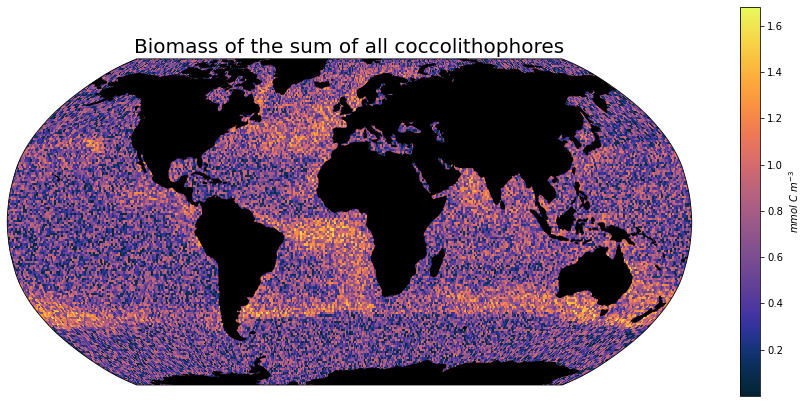

In [20]:
proj=ccrs.Robinson(central_longitude=0)
pc=ccrs.PlateCarree()
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(111,projection=proj)
cax = fig.add_axes([0.9,0.1,0.02,0.9])  # x y width and height

ax.coastlines()
mappable=ax.pcolormesh(ds.longitude,ds.latitude,bio_array,transform=pc,cmap=com.cm.thermal)
                     #vmin=1e-10,vmax=1.75)
#plt.imshow(bio_array,interpolation='bicubic')
ax.add_feature(cfeature.LAND,facecolor='black',zorder=10)
#cbar = colorbar.ColorbarBase(ax, cmap=plt.get_cmap('coolwarm'),
 #                           norm=colors.Normalize(vmin=0.0,vmax=1e-9))
#cbar.set_clim(1e-10,9e-10)
ax.set_title('Biomass of the sum of all coccolithophores',size=20)

cbar = plt.colorbar(mappable,cax=cax,orientation='vertical')
#cbar.set_label(r"$\alpha$")
cbar.set_label(r"$mmol$ $C$ $m^{-3}$")
#cbar.set_ticks(np.arange(0.5,1.5,0.1)) #resolution
#fig.savefig("/home/weixuan/Desktop/Jupyter notebook/maps/map_sum.png")

## Maps of each thermal type

/home/weixuan/.conda/envs/pykernel3/lib/python3.10/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/weixuan/.conda/envs/pykernel3/lib/python3.10/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/weixuan/.conda/envs/pykernel3/lib/python3.10/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/weixuan/.conda/envs/pyker

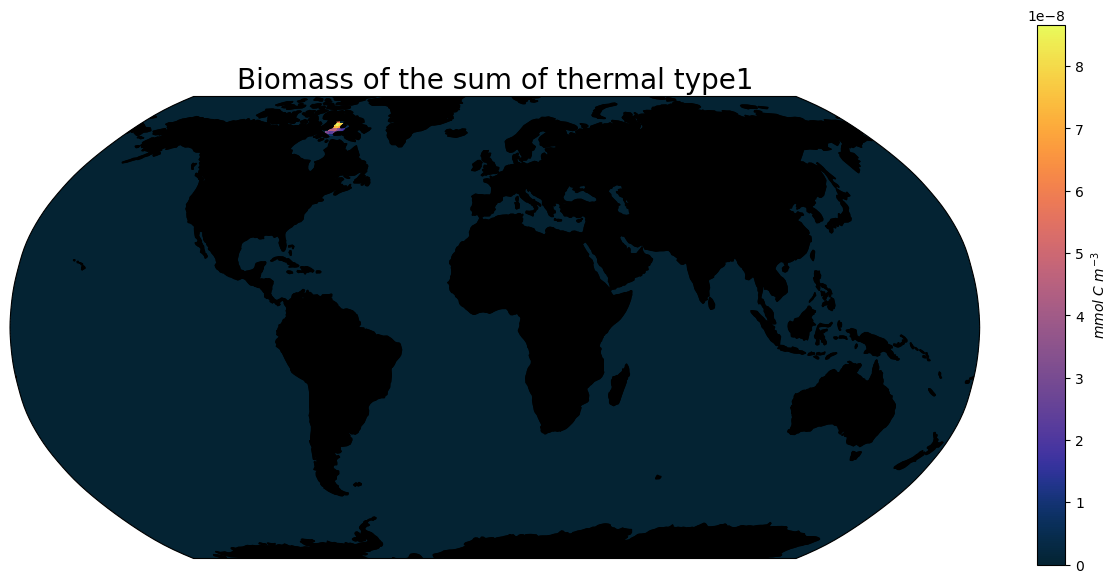

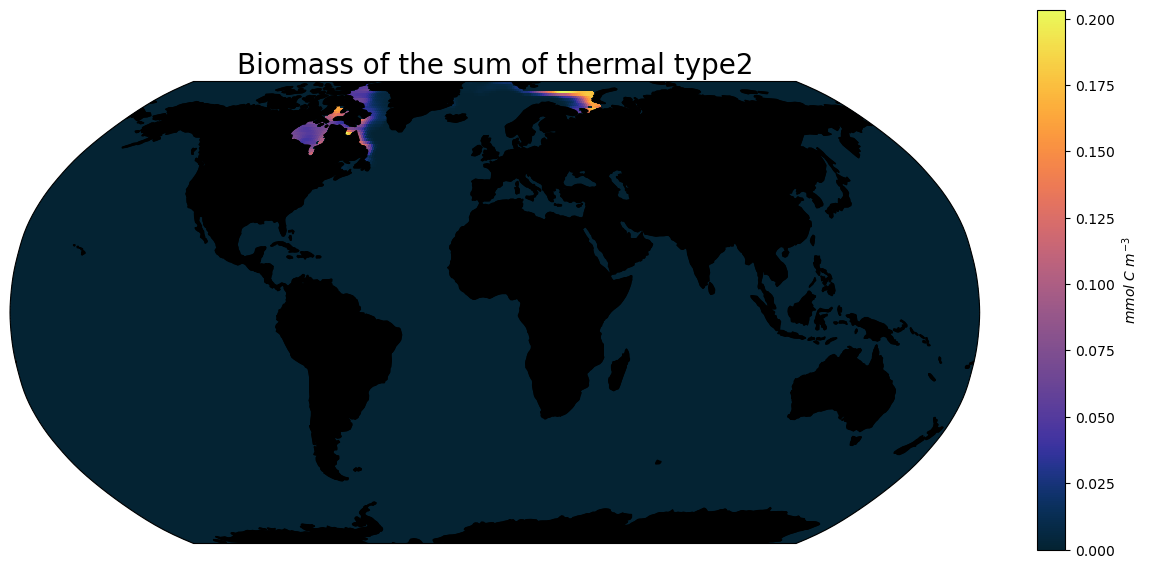

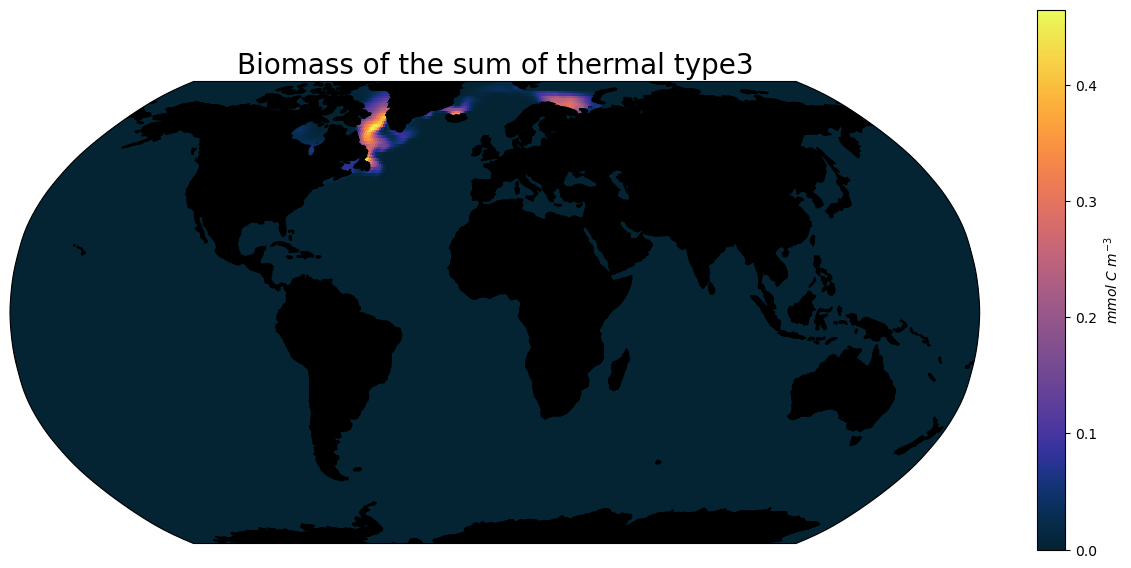

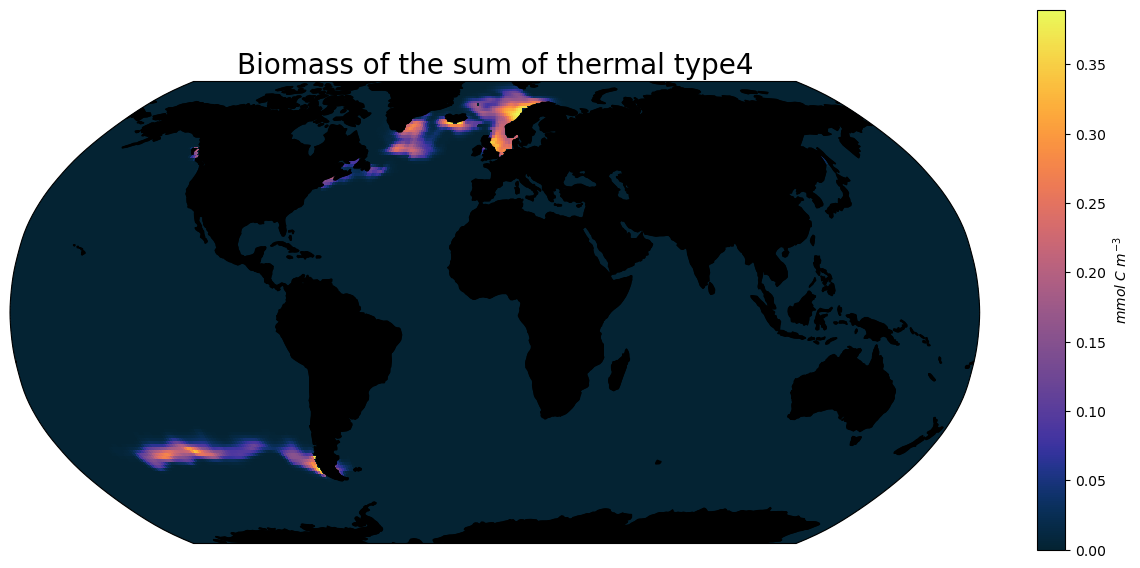

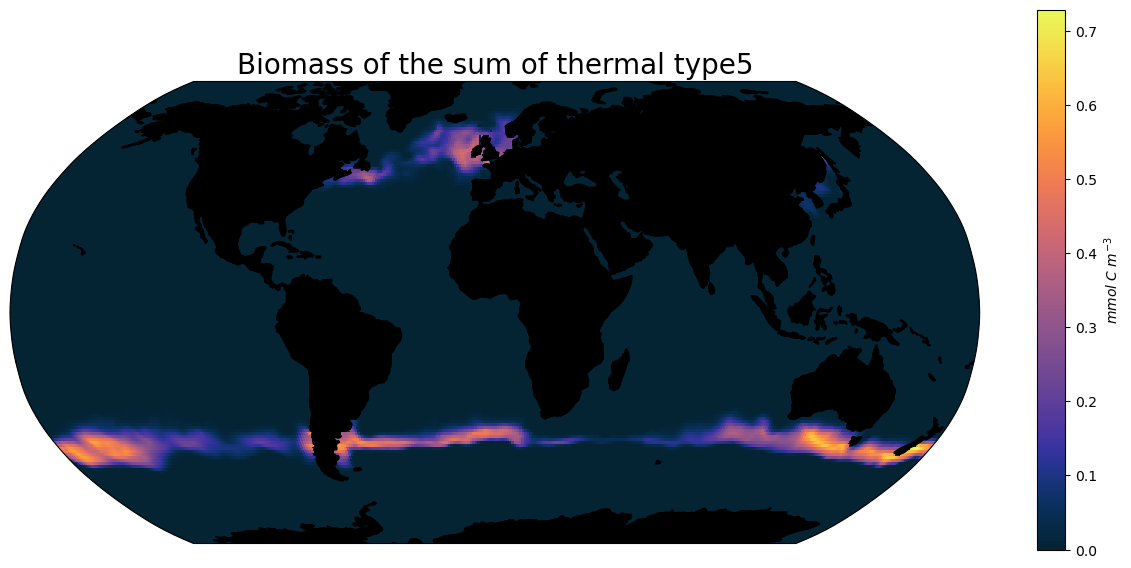

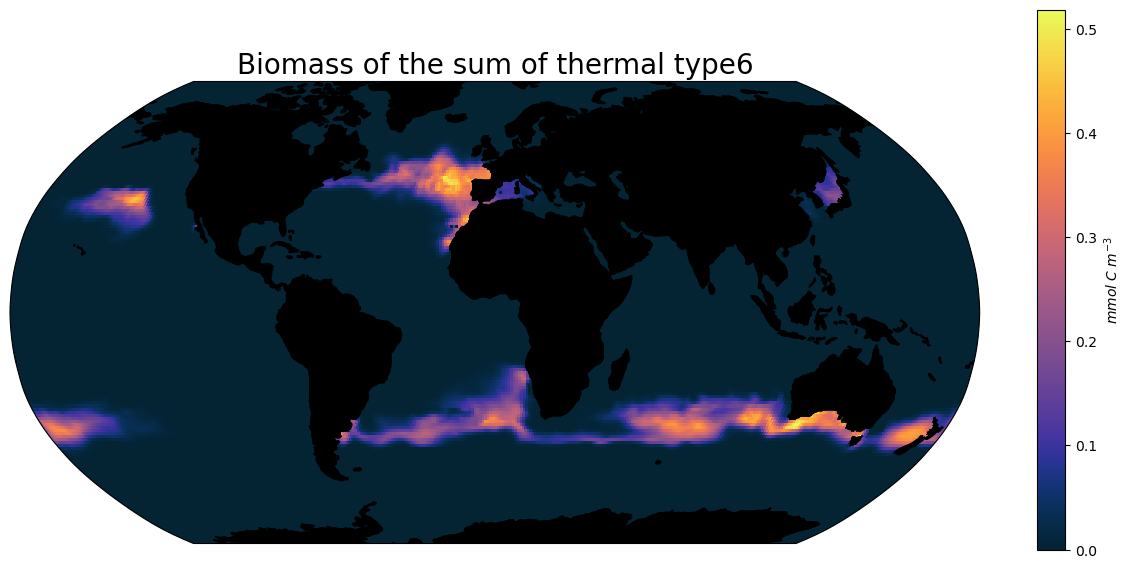

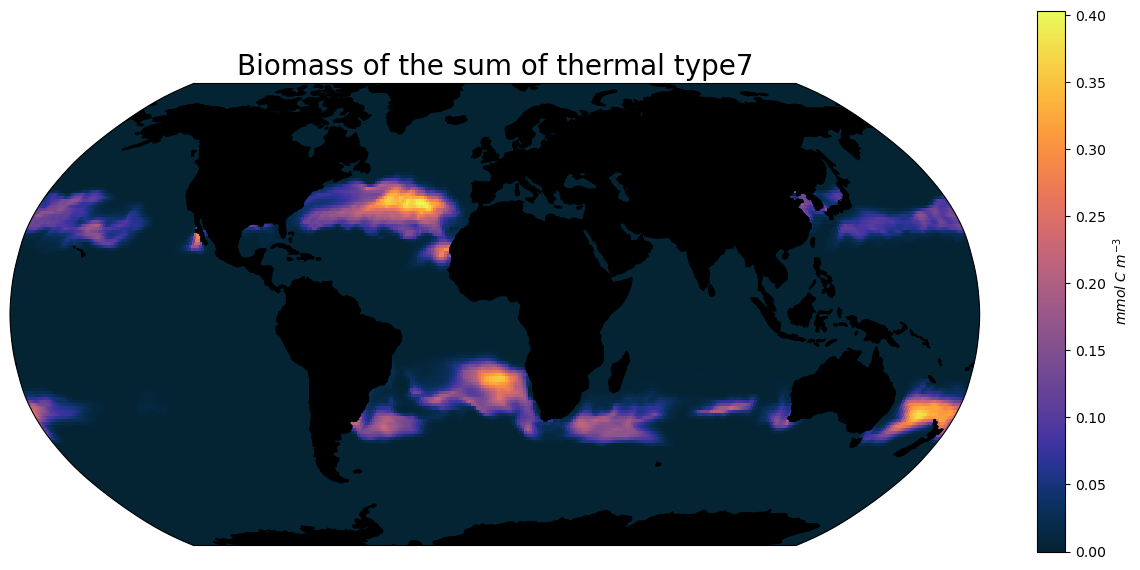

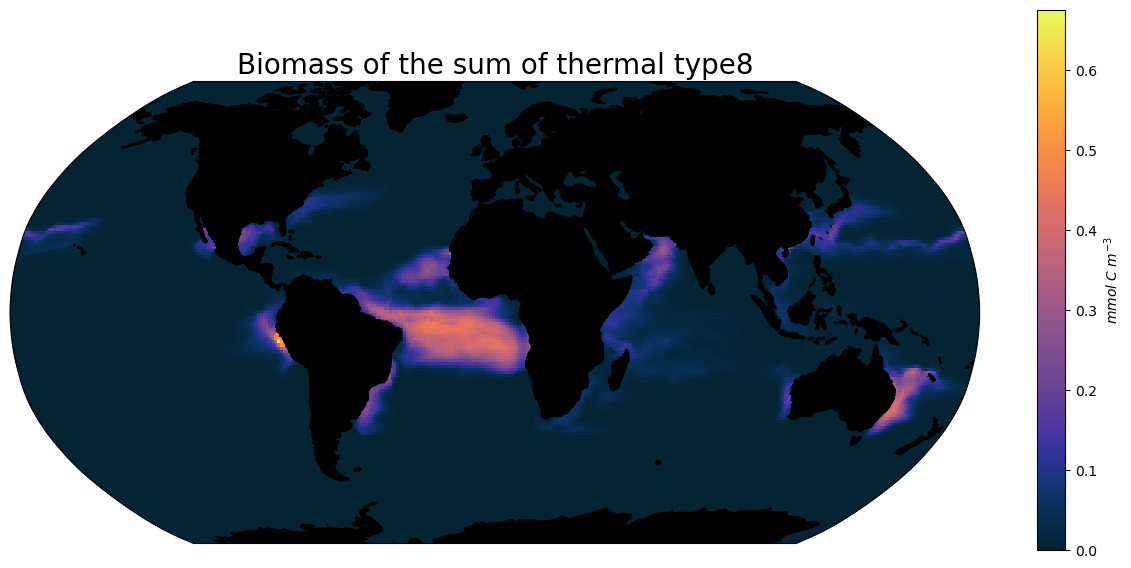

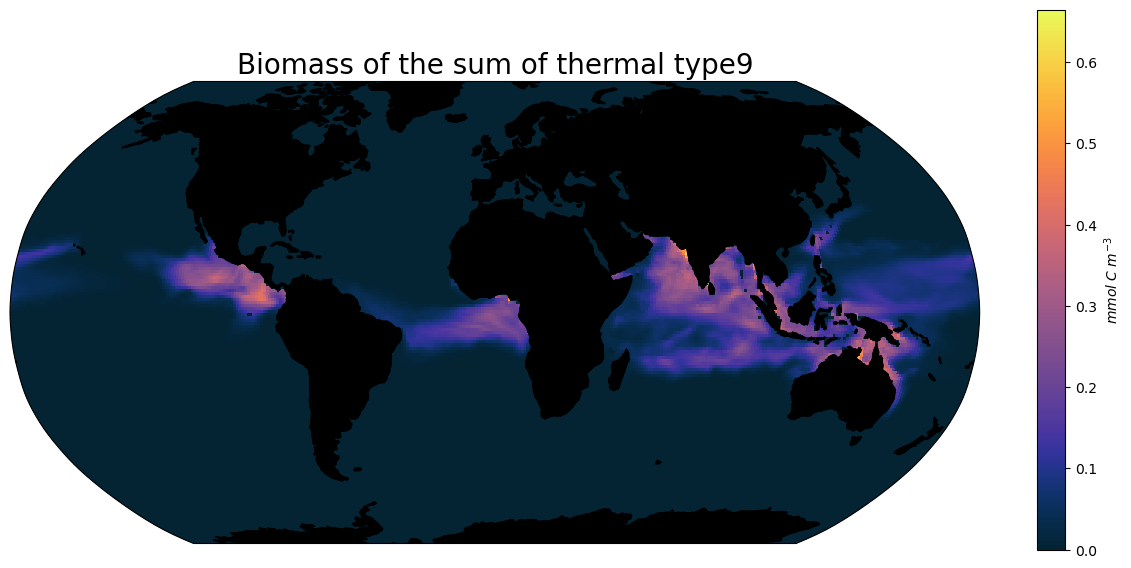

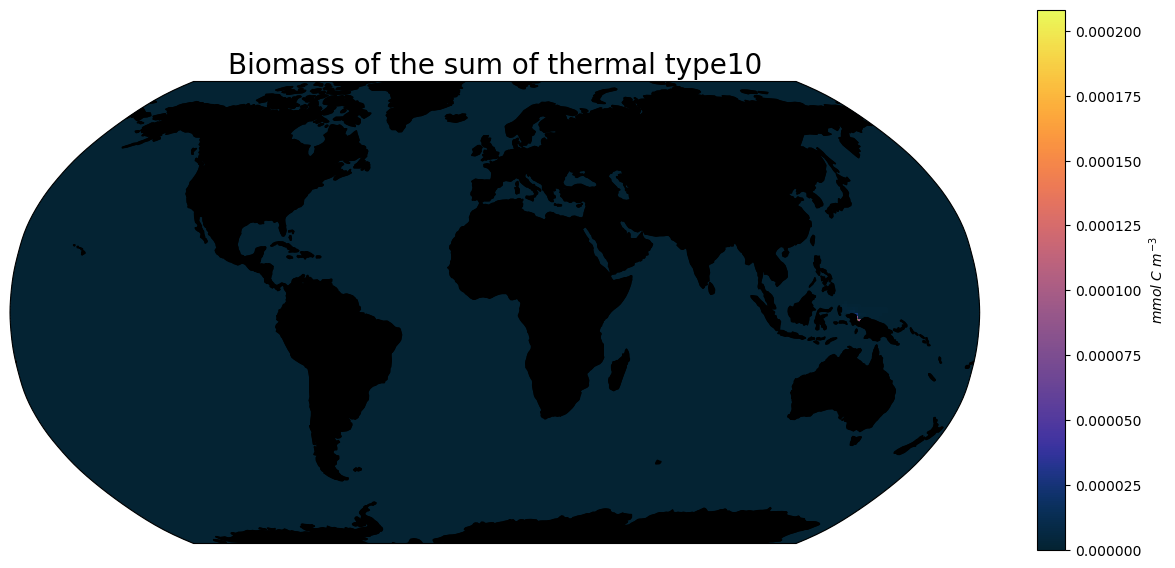

In [15]:
for n in (x+1 for x in range(10)):
    proj=ccrs.Robinson(central_longitude=0)
    pc=ccrs.PlateCarree()
    fig=plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111,projection=proj)
    cax = fig.add_axes([0.9,0.1,0.02,0.9])  # x y width and height

    ax.coastlines()
    mappable=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap=com.cm.thermal)
    ax.add_feature(cfeature.LAND,facecolor='black',zorder=10)
    ax.set_title('Biomass of the sum of thermal type'+str(n),size=20)
    cbar = plt.colorbar(mappable,cax=cax,orientation='vertical')
    cbar.set_label(r"$mmol$ $C$ $m^{-3}$")
    fig.savefig("/home/weixuan/Desktop/Jupyter notebook/maps/map_thermal"+str(n)+".png")

## Maps of whole biomass with 50 percent transparency

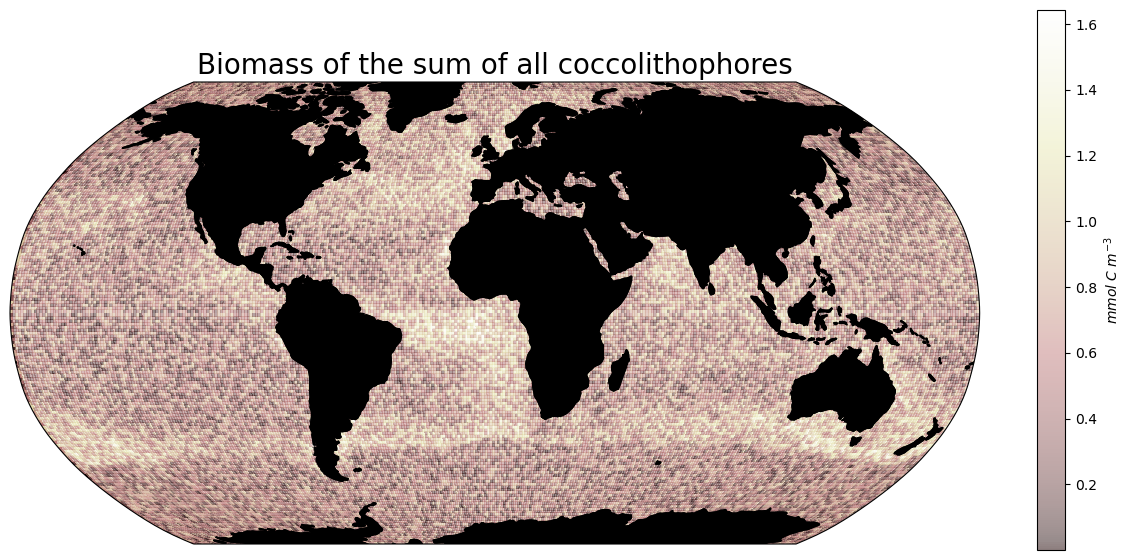

In [18]:
proj=ccrs.Robinson(central_longitude=0)
pc=ccrs.PlateCarree()
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(111,projection=proj)
cax = fig.add_axes([0.9,0.1,0.02,0.9])  # x y width and height

ax.coastlines()
mappable=ax.pcolormesh(ds.longitude,ds.latitude,bio_array,transform=pc,cmap='pink',alpha=0.5)

#facecolors = mappable.get_facecolors()
#alphas = np.linspace(0.1, 1, len(facecolors))
#facecolors[:,-1] = alphas
# mappable.set_facecolors(facecolors)

ax.add_feature(cfeature.LAND,facecolor='black',zorder=10)
ax.set_title('Biomass of the sum of all coccolithophores',size=20)
cbar = plt.colorbar(mappable,cax=cax,orientation='vertical')
cbar.set_label(r"$mmol$ $C$ $m^{-3}$")


## Maps of each thermal types biomass in one figure_first draft

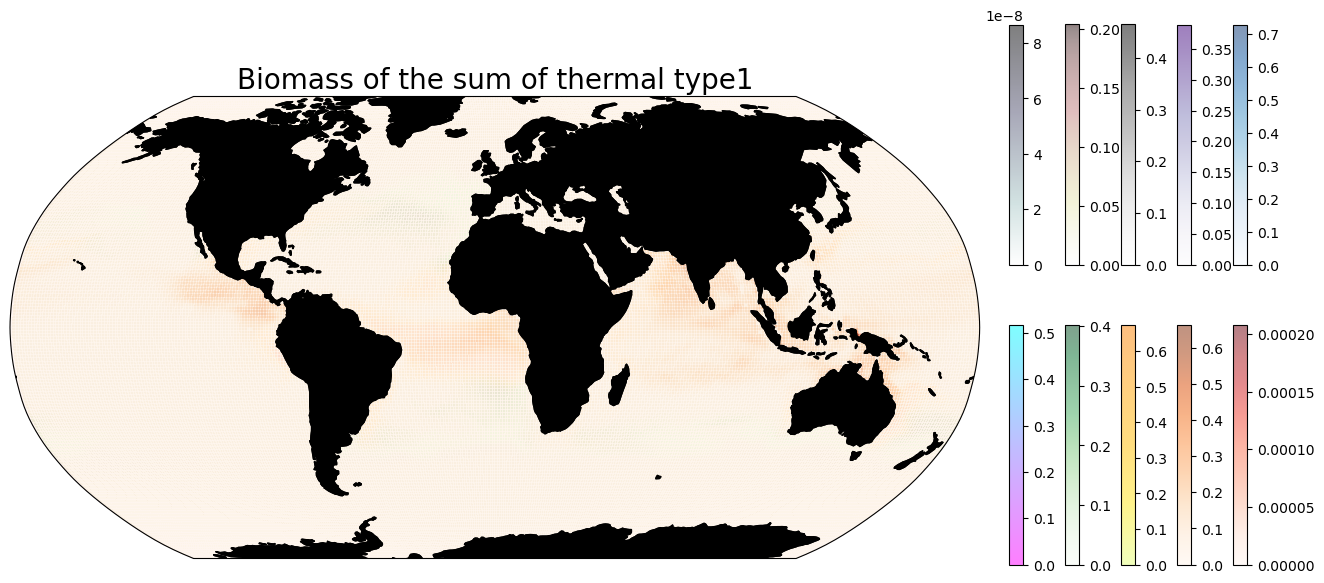

In [68]:
    n=1
    proj=ccrs.Robinson(central_longitude=0)
    pc=ccrs.PlateCarree()
    fig=plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111,projection=proj)
    cax = fig.add_axes([0.88,0.6,0.01,0.4])  # x y width and height
    cax2 = fig.add_axes([0.92,0.6,0.01,0.4])
    cax3 = fig.add_axes([0.96,0.6,0.01,0.4])
    cax4 = fig.add_axes([1.00,0.6,0.01,0.4])
    cax5 = fig.add_axes([1.04,0.6,0.01,0.4])
    cax6 = fig.add_axes([0.88,0.1,0.01,0.4])
    cax7 = fig.add_axes([0.92,0.1,0.01,0.4])
    cax8 = fig.add_axes([0.96,0.1,0.01,0.4])
    cax9 = fig.add_axes([1.00,0.1,0.01,0.4])
    cax10 = fig.add_axes([1.04,0.1,0.01,0.4])

    ax.coastlines()
    mappable=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='bone_r',alpha=0.5)
    ax.add_feature(cfeature.LAND,facecolor='black',zorder=10)
    ax.set_title('Distribution map of coccolithophores', size=20)
    cbar = plt.colorbar(mappable,cax=cax,orientation='vertical')
    ax.set_autoscale_on(False)
    
    n=2
    mappable2=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='pink_r',alpha=0.5)
    cbar2 = plt.colorbar(mappable2,cax=cax2,orientation='vertical')
    
    n=3
    mappable3=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Greys',alpha=0.5)
    cbar3 = plt.colorbar(mappable3,cax=cax3,orientation='vertical')
    
    n=4
    mappable4=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Purples',alpha=0.5)
    cbar4 = plt.colorbar(mappable4,cax=cax4,orientation='vertical')
    
    n=5
    mappable5=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Blues',alpha=0.5)
    cbar5 = plt.colorbar(mappable5,cax=cax5,orientation='vertical')
    
    n=6
    mappable6=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='cool_r',alpha=0.5)
    cbar6 = plt.colorbar(mappable6,cax=cax6,orientation='vertical')
    
    n=7
    mappable7=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Greens',alpha=0.5)
    cbar7 = plt.colorbar(mappable7,cax=cax7,orientation='vertical')
    
    n=8
    mappable8=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Wistia',alpha=0.5)
    cbar8 = plt.colorbar(mappable8,cax=cax8,orientation='vertical')
    
    n=9
    mappable9=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Oranges',alpha=0.5)
    cbar9 = plt.colorbar(mappable9,cax=cax9,orientation='vertical')
    
    n=10
    mappable10=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='Reds',alpha=0.5)
    cbar10 = plt.colorbar(mappable10,cax=cax10,orientation='vertical')

## Maps of each thermal types biomass in one figure_final draft

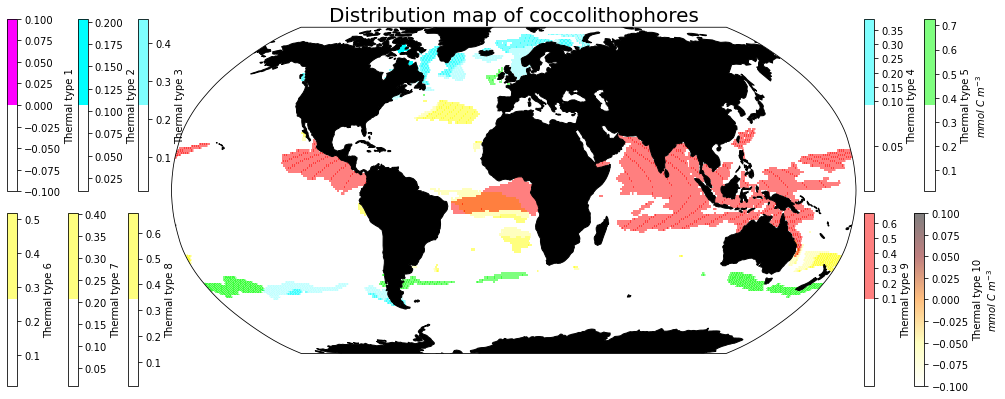

In [53]:
for i in range(10):
    where_loc = np.where(biot[i-1,:,:]<0.01)
    biot[i-1,where_loc[0],where_loc[1]] = np.nan

n=1
proj=ccrs.Robinson(central_longitude=0)
pc=ccrs.PlateCarree()
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(111,projection=proj)
cax = fig.add_axes([0.01,0.5,0.01,0.4])  # x y width and height
cax2 = fig.add_axes([0.08,0.5,0.01,0.4])
cax3 = fig.add_axes([0.14,0.5,0.01,0.4])
cax4 = fig.add_axes([0.86,0.5,0.01,0.4])
cax5 = fig.add_axes([0.92,0.5,0.01,0.4])
cax6 = fig.add_axes([0.01,0.05,0.01,0.4])
cax7 = fig.add_axes([0.07,0.05,0.01,0.4])
cax8 = fig.add_axes([0.13,0.05,0.01,0.4])
cax9 = fig.add_axes([0.86,0.05,0.01,0.4])
cax10 = fig.add_axes([0.91,0.05,0.01,0.4])

def make_cmap(r,g,b):
    colors = [(255,255,255), (r,g,b)]
    cm = LinearSegmentedColormap.from_list(
        "segmented", colors, N=2)
    return cm

ax.coastlines()
mappable=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                       cmap=make_cmap(127,0,255))
ax.add_feature(cfeature.LAND,facecolor='black',zorder=10)
ax.set_title('Distribution map of coccolithophores', size=20)
cbar = plt.colorbar(mappable,cax=cax,orientation='vertical')
cbar.set_label("Thermal type 1")
facecolors = mappable.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
    i[3] = j / max_biomass
ax.set_autoscale_on(False)

n=2
mappable2=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                       cmap=make_cmap(0,127,255))
cbar2 = plt.colorbar(mappable2,cax=cax2,orientation='vertical')
cbar2.set_label("Thermal type 2")
facecolors = mappable2.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=3
mappable3=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(0,255,255),alpha=0.5)
cbar3 = plt.colorbar(mappable3,cax=cax3,orientation='vertical')
cbar3.set_label("Thermal type 3")
facecolors = mappable3.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=4
mappable4=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(0,255,127),alpha=0.5,
                        norm = colors.TwoSlopeNorm(vmin=np.nanmin(biot[n-1,:,:]), 
                                                    vcenter=np.nanmedian(biot[n-1,:,:]), 
                                                    vmax=np.nanmax(biot[n-1,:,:])))
cbar4 = plt.colorbar(mappable4,cax=cax4,orientation='vertical')
cbar4.set_label("Thermal type 4")
facecolors = mappable4.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=5
mappable5=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(0,255,0),alpha=0.5)
cbar5 = plt.colorbar(mappable5,cax=cax5,orientation='vertical')
cbar5.set_label("Thermal type 5\n"r"$mmol$ $C$ $m^{-3}$")
facecolors = mappable5.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=6
mappable6=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],
                        cmap=make_cmap(127,255,0),alpha=0.5)
cbar6 = plt.colorbar(mappable6,cax=cax6,orientation='vertical')
cbar6.set_label("Thermal type 6")
facecolors = mappable6.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=7
mappable7=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(255,255,0),alpha=0.5)
cbar7 = plt.colorbar(mappable7,cax=cax7,orientation='vertical')
cbar7.set_label("Thermal type 7")
facecolors = mappable7.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=8
mappable8=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(255,127,0),alpha=0.5)
cbar8 = plt.colorbar(mappable8,cax=cax8,orientation='vertical')
cbar8.set_label("Thermal type 8")
facecolors = mappable8.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=9
mappable9=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,
                        cmap=make_cmap(255,0,0),
                        norm = colors.TwoSlopeNorm(vmin=np.nanmin(biot[n-1,:,:]), 
                                                    vcenter=np.nanmedian(biot[n-1,:,:]), 
                                                    vmax=np.nanmax(biot[n-1,:,:])),
                        alpha=0.5)
cbar9 = plt.colorbar(mappable9,cax=cax9,orientation='vertical')
cbar9.set_label("Thermal type 9")
facecolors = mappable9.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

n=10
mappable10=ax.pcolormesh(ds.longitude,ds.latitude,biot[n-1,:,:],transform=pc,cmap='afmhot_r',alpha=0.5)
cbar10 = plt.colorbar(mappable10,cax=cax10,orientation='vertical')
cbar10.set_label("Thermal type 10\n"r"$mmol$ $C$ $m^{-3}$")
facecolors = mappable10.get_facecolors()
max_biomass = np.max(biot[n-1,:,:])
for i,j in zip(facecolors,biot[n-1,:,:].flatten()):
   i[3] = j / max_biomass

#fig.savefig("/home/weixuan/Desktop/Jupyter notebook/maps/Distribution map of coccolithophores_aik.png")

In [51]:
biot[5-1,:,:][0]

nan

In [37]:
np.nanmin(biot[n-1,:,:])

/tmp/ipykernel_43404/1820018356.py:1: RuntimeWarning: All-NaN slice encountered
  np.nanmin(biot[n-1,:,:])


nan

In [ ]:
colors = [(255,255,255), (255, 0, 0)] # first color is white, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)